In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft,ifft,fftfreq,fftshift

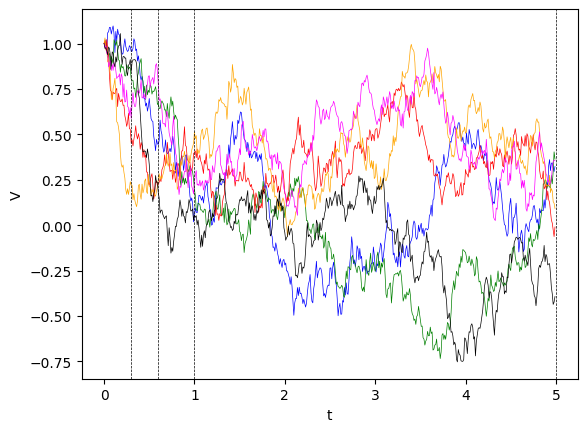

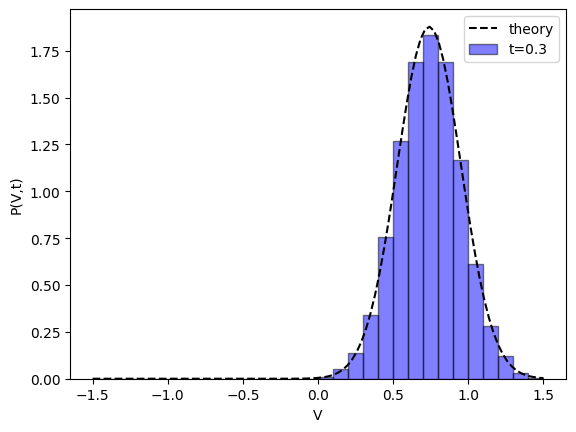

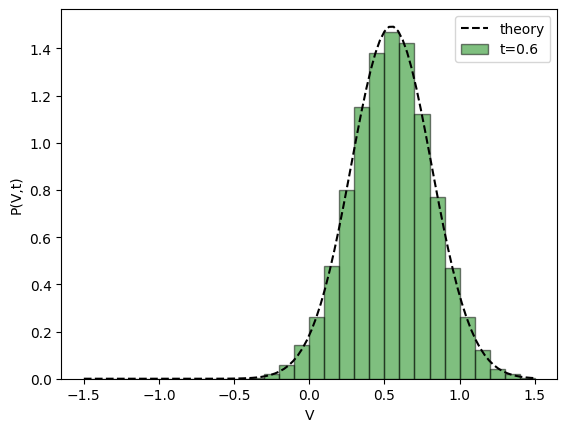

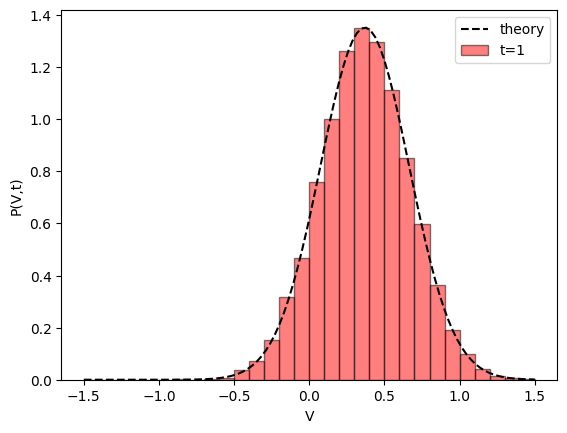

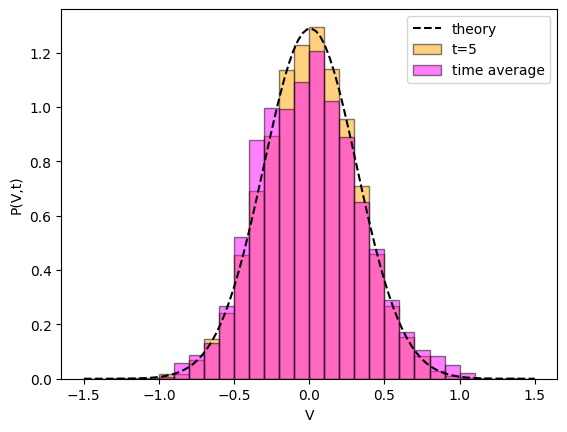

In [ ]:
#Simulation of the OU Process and the corresponding probability density

#parameters
D = 0.1
gamma = 1
K = 10**4
delta_t = 0.01
color_palette = ['blue', 'green', 'red', 'orange', 'magenta', 'black']
v0 = 1
N = 10**4

v = np.zeros((N,K))
for i in range(N-1):
    v[i][0]=v0
dv = 0.08
len_V_intervall = 2.4

#simulate random variable

for j in range(N-1):
    for i in range(K-1):
        eta = np.random.randn()
        v[j][i+1] = v[j][i]*(1-gamma*delta_t)+np.sqrt(2*D*delta_t)*eta
    if j <= 5:
        plt.plot([i*delta_t for i in range(500)],[v[j][i] for i in range(500)], color=color_palette[j],linewidth = 0.5)
plt.xlabel('t')
plt.ylabel('V')
plt.axvline(0.3, linestyle = 'dashed', color='black', linewidth=0.5)
plt.axvline(0.6, linestyle = 'dashed', color='black', linewidth=0.5)
plt.axvline(1, linestyle = 'dashed', color='black', linewidth=0.5)
plt.axvline(5, linestyle = 'dashed', color='black', linewidth=0.5)
plt.show()

#probibility density function (unnecessary)

def P(V,K):
    sum = 0
    for i in range(N-1):
        sum += np.heaviside(V+(dv/2)-v[i][K],1)*np.heaviside(v[i][K]-(V-(dv/2)),1)
    return 1/(N*dv) * sum

#def solution to Fokker-Planck equation
def p(V,t):
    average = 0
    for i in range(N-1):
        average+=v[i][int(t/delta_t)]
    average=average/(N-1)
    variance = 0
    for j in range(N-1):
        variance+= ((v[j][int(t/delta_t)])**2 - average**2)
    variance = variance/(N-1)

    return 1/np.sqrt((2*np.pi*variance)) * np.exp(-(V-average)**2/(2*variance))



#density as histogram
time_instants = [0.3,0.6,1,5]
V = np.linspace(-1.5,1.5,100)


for k in range(len(time_instants)):
    plt.plot(V,[p(V[i],time_instants[k]) for i in range(len(V))], color='black', label='theory', linestyle='dashed')
    plt.hist([v[i][int(time_instants[k]/delta_t)] for i in range(N-1)],bins=30,range=(-1.5,1.5),density=True, color=color_palette[k],alpha=0.5,edgecolor='k', label=f't={time_instants[k]}')
    if k == len(time_instants)-1:
        plt.hist([v[1][i] for i in range(K-1)],bins=30,range=(-1.5,1.5),density=True, color=color_palette[k+1],alpha=0.5,edgecolor='k', label='time average')
    plt.xlabel('V')
    plt.ylabel('P(V,t)')
    plt.legend()
    plt.show()

#plot for different points in time

#for k in range(len(time_instants)):
    #V = np.linspace(-1.2,1.2,int(time_instants[k]/delta_t))
    #plt.scatter(V,[P(V[i],int(time_instants[k]/delta_t)) for i in range(len(V))], label=f"t={time_instants[k]}", color=color_palette[k],linewidths=1, marker='_')
    #plt.xlabel('V')
    #plt.ylabel('P(V,t)')
    #plt.legend()

#plt.show()





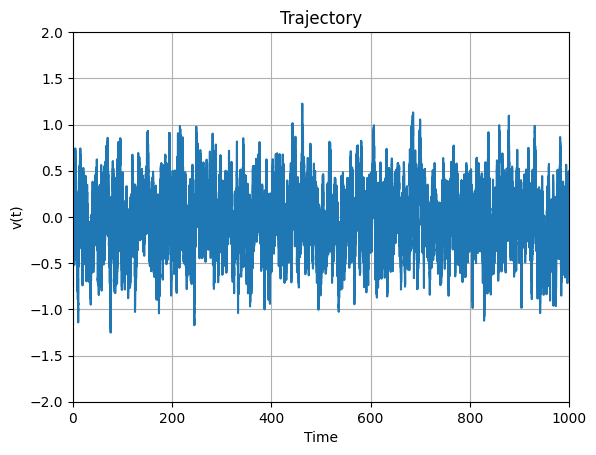

In [ ]:
#Simulate the OU Process and plot trajectory
# Parameters
D = 0.1
gamma = 1
dt = 0.001
T = 1000
N = int(T / dt)

# Simulate
v = np.zeros(N)

for i in range(1, N):
    v[i] = v[i-1] - gamma * v[i-1] * dt + np.sqrt(2 * D * dt) * np.random.randn()

# Plot (a): Trajectory
t = np.arange(N) * dt
plt.plot(t, v) 
plt.title("Trajectory")
plt.xlabel("Time")
plt.ylabel("v(t)")
plt.axis([0,1000,-2,2])
plt.grid()
plt.show()


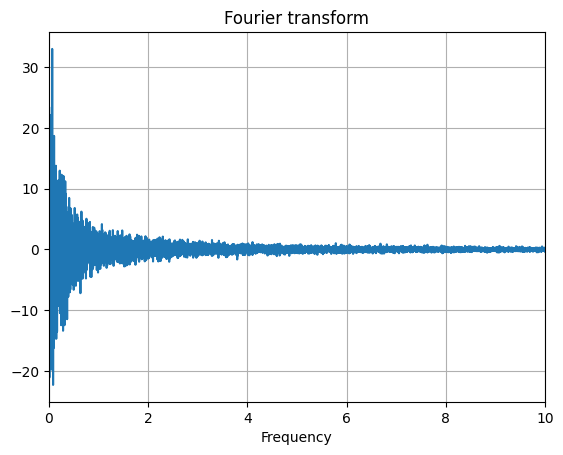

In [ ]:
# Compute FFT
v_ft = fft(v) / np.sqrt(N)  # Normalized with 1/sqrt(N) to ensure proper scaling
frequencies = fftfreq(N, dt)

# Plot (b): Real part of FT (zoom in)
plt.plot(frequencies[:N//2], v_ft[:N//2].real)
plt.xlim(0, 10)
plt.title("Fourier transform")
plt.xlabel("Frequency")
plt.grid()
plt.show()


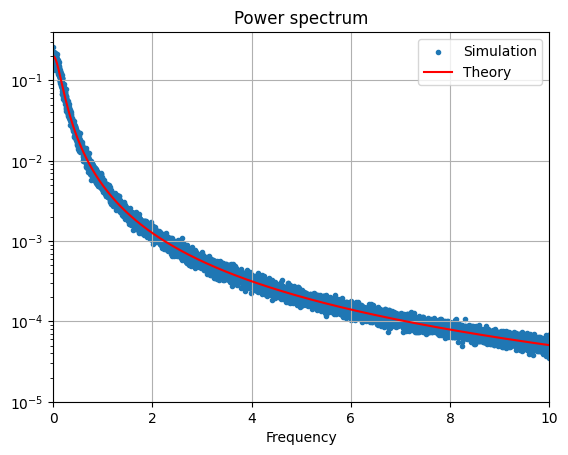

In [ ]:
# Ensemble average over M realizations
M = 100
psd_accum = np.zeros(N)

for _ in range(M):
    v = np.zeros(N)
    for i in range(1, N):
        v[i] = v[i-1] - gamma * v[i-1] * dt + np.sqrt(2 * D * dt) * np.random.randn()
    v_ft = fft(v) / np.sqrt(N)
    psd_accum += np.abs(v_ft)**2  # Power spectrum = |FT|^2

psd_avg = psd_accum / (M*T)

#Define theoretical power spectrum
def S(f):
    return (2*D)/(gamma**2+(2*np.pi*f)**2)

# Plot (d): Power Spectrum (log-scale)
plt.scatter(frequencies[:N//2], psd_avg[:N//2], linewidths=1, marker='.', label='Simulation')
plt.plot(frequencies,[S(f) for f in frequencies],color='red',label='Theory')
plt.yscale('log')
plt.xlim(0, 10)
plt.ylim(1e-5, 0.4)
plt.title("Power spectrum")
plt.xlabel("Frequency")
plt.legend()
plt.grid()
plt.show()


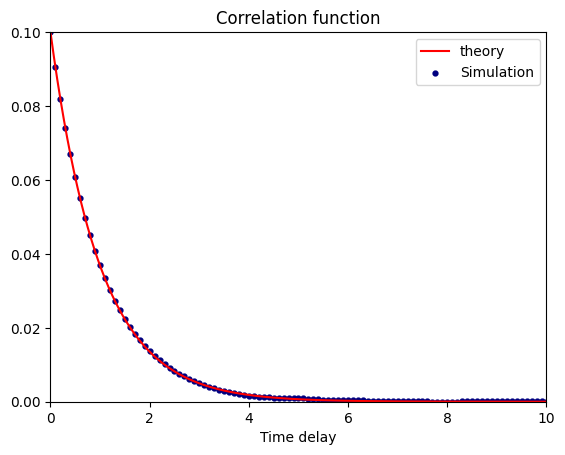

In [148]:
#inverse transformation to obtain the correlation function

correlation = fft(psd_avg)/np.sqrt(N)
tau = np.arange(len(correlation))*dt

#Define theoretic correlation function
def C(tau):
    return D/gamma * np.exp(-gamma*np.abs(tau))
C = [C(t) for t in tau]

#Plot (c): Correlation function

plt.plot(tau, C, color='red', label='theory')
plt.scatter(tau[::100],correlation[::100],linewidths=1.5, marker='.', label='Simulation', color='navy')
plt.xlim(0,10)
plt.ylim(0,0.1)
plt.legend()
plt.title('Correlation function')
plt.xlabel('Time delay')
plt.show()

In [367]:
#The two state renewal process

#parameters
m = 2
dt = 10**(-m)
T = 100
N = int(T/dt)
tau_D = [0.1,1,2]     #refractory periods

#Simulate

#generate exponentially distributed reisdence times
size = 120
rng = np.random.default_rng()
sample = rng.exponential(scale=1.0,size=size)
sample = [round(i,m) for i in sample]   # round samples to digits according to time step size

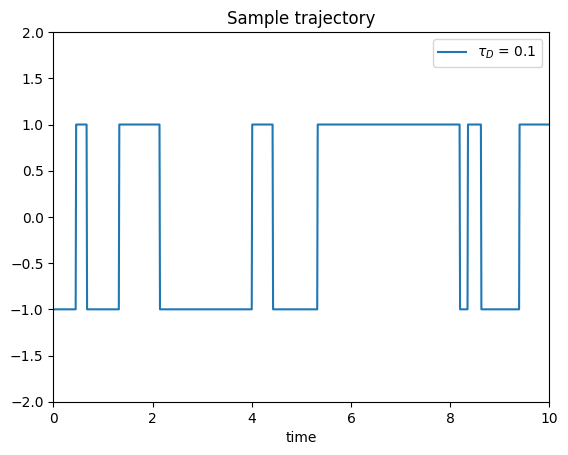

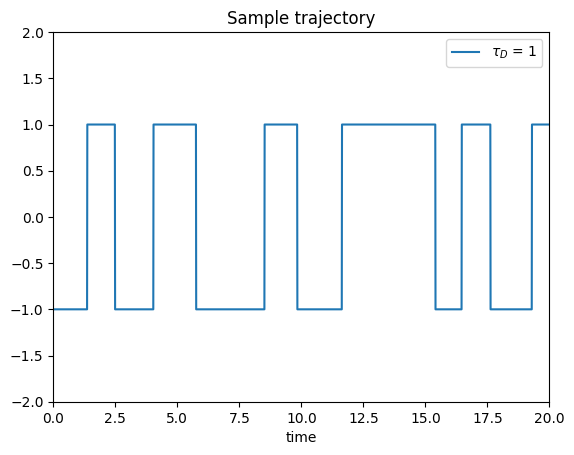

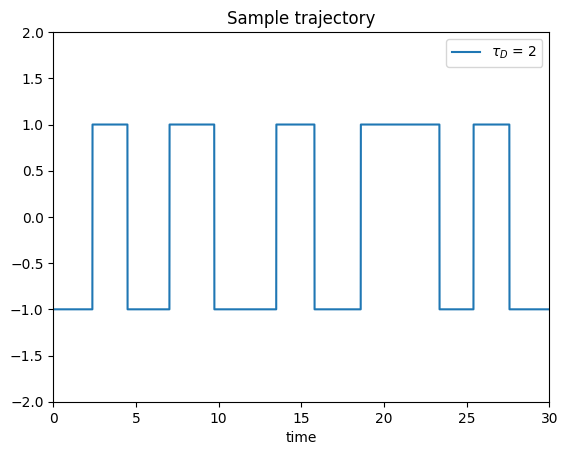

In [368]:
#define step function off of residence times
def sigma(data,x0):
    x0 = x0
    state_values = []
    for t in data:
        state_values.extend([x0 for k in range(int(t/dt))])
        x0 = -x0
    return state_values

#plot trajecotries
t = np.arange(N)*dt
for i in range(len(tau_D)):
    plt.plot(t,sigma([x + tau_D[i] for x in sample],-1)[:N], label= f'$\\tau_D$ = {tau_D[i]}')
    plt.title('Sample trajectory')
    plt.xlabel('time')
    plt.ylim(-2,2)
    plt.xlim(0,10*(i+1))
    plt.legend()
    plt.show()


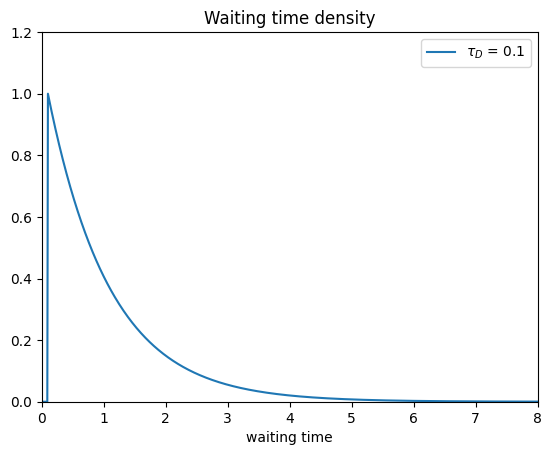

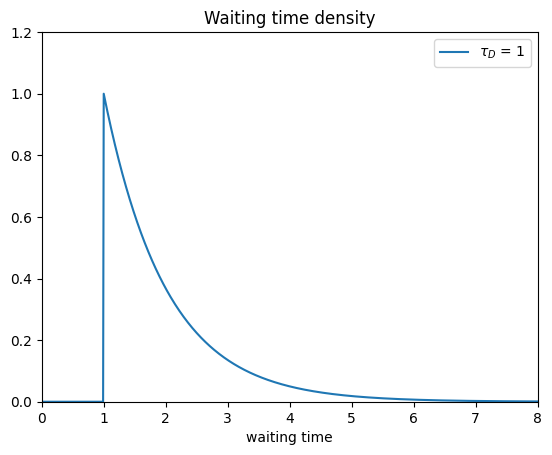

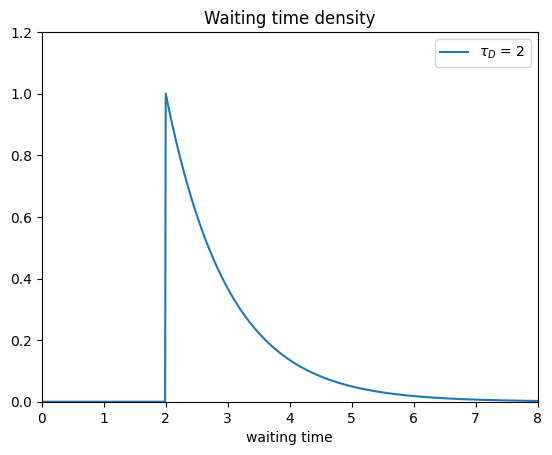

In [284]:
#define the waiting time density function
def w(t,tau_D):
    if t < tau_D:
        return 0
    else:
        return np.exp(-(t-tau_D))

#plot the waiting time density function
for i in range(len(tau_D)):    
    plt.plot(t,[w(x,tau_D[i]) for x in t],label=f'$\\tau_D$ = {tau_D[i]}')
    plt.xlim(0,8)
    plt.ylim(0,1.2)
    plt.title('Waiting time density')
    plt.xlabel('waiting time')
    plt.legend()
    plt.show()






Simulating for tau_D = 0.1...


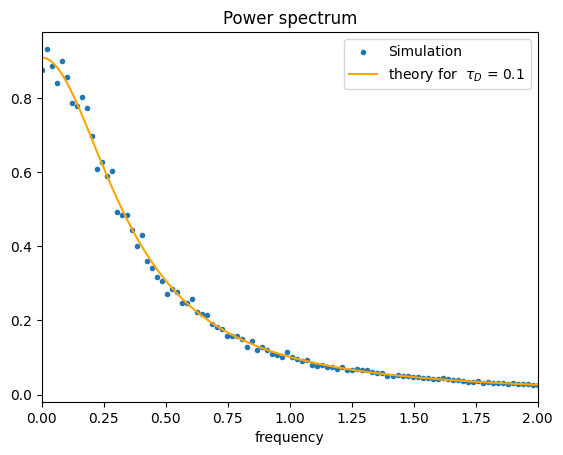

Simulating for tau_D = 1.0...


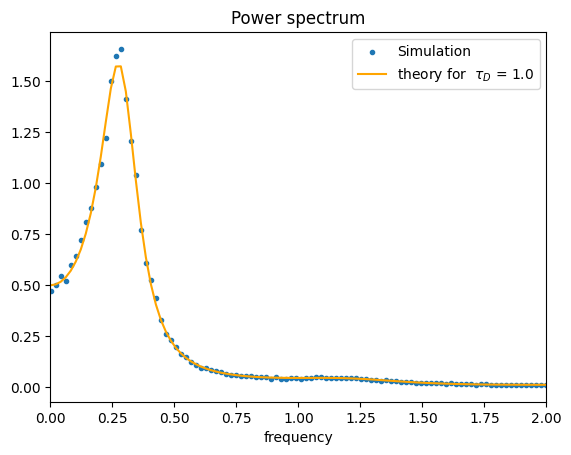

Simulating for tau_D = 2.0...


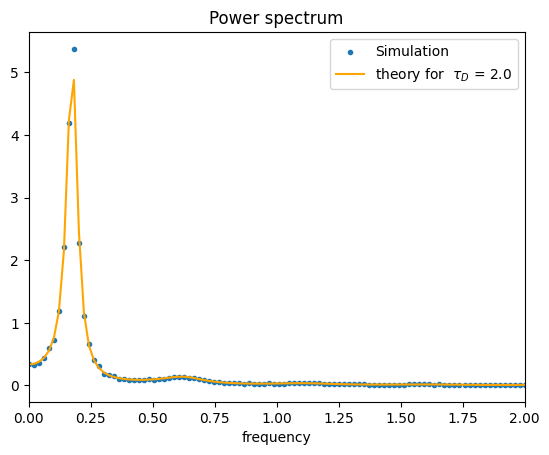

In [ ]:
# --- Configuration Parameters ---
T = 500       # Total simulation time for each realization (increased for better low-freq convergence)
M = 500      # Number of realizations for ensemble averaging (increased for smoother results)
tau_exp = 1.0 # Mean of the exponential waiting time
tau_D_values = [0.1, 1.0, 2.0] # Refractory periods to simulate

# Frequencies for Fourier Transform and plotting
# Starting from 0.001 to get closer to DC, but avoid exactly 0 for division
freq_min = 0.001
freq_max = 2.0
num_freq_points = 100
freq_points = np.linspace(freq_min, freq_max, num_freq_points)

# Initialize random number generator
rng = np.random.default_rng()

def ft_two_state_process(res_times,initial_state):
    result = np.zeros(len(freq_points), dtype=complex)
    j = 1j

    for i, freq_val in enumerate(freq_points):
        current_sum = 0.0
        current_time = 0.0

        for k in range(len(res_times)):
            segment_start_time = current_time
            segment_duration = res_times[k]
            segment_end_time = current_time + res_times[k]

            state_value = (-1)**k * initial_state

            #Calculate integral segement
            prefactor = 1/(j*2*np.pi*freq_val)
            
            if freq_val != 0:
                exp_end = np.exp(j*2*np.pi*freq_val*segment_end_time)
                exp_start = np.exp(j*2*np.pi*freq_val*segment_start_time)
                
                segment_integral = prefactor * state_value * (exp_end-exp_start)
            else:
                segment_integral = state_value * segment_duration

            current_sum += segment_integral
            current_time = segment_end_time

        result[i] = current_sum

    return result

#define theoretical power spectrum
def S(f,tau_D):
    return 0.5 * (((1+1)**2 * 1**2)/(1+tau_D)) / (1 + np.cos(2*np.pi*f*tau_D) - 2*np.pi*f*1*np.sin(2*np.pi*f*tau_D) + 2*(np.pi*f*1)**2)

# --- Main Simulation ---

for tau_idx, current_tau_D in enumerate(tau_D_values):

    print(f"Simulating for tau_D = {current_tau_D}...")
    sum_ft_abs_squared = np.zeros(len(freq_points))

    for m in range(M):
        
        realization_res_times = []
        realization_total_time = 0.0

        #Generate the waiting times and make sure it coincides with the total time
        while True:

            new_res_time = rng.exponential(scale=tau_exp) + current_tau_D
            
            # Check if adding this segment would exceed total simulation time T
            if realization_total_time + new_res_time > T:
                # Truncate the last segment to fit exactly within T
                remaining_time = T - realization_total_time
                if remaining_time > 0: # Only add if there's remaining time
                    realization_res_times.append(remaining_time)
                break # This realization is complete
            else:
                realization_res_times.append(new_res_time)
                realization_total_time += new_res_time
            
        # Calculate Fourier Transform for this realization
        ft_current_realization = ft_two_state_process(realization_res_times, initial_state=-1)
        
        # Add the squared magnitude to the accumulator
        sum_ft_abs_squared += np.abs(ft_current_realization)**2

    # Calculate the ensemble-averaged power spectrum
    # Normalization: Sum of |FT|^2 / (M * T)
    simulated_power_spectrum = sum_ft_abs_squared / (M * T)

    #Plotting
    plt.scatter(freq_points,simulated_power_spectrum,linewidths=1, marker='.', label='Simulation')
    plt.plot(freq_points,[S(x,current_tau_D) for x in freq_points], label=f'theory for  $\\tau_D$ = {current_tau_D}', color = 'orange')
    plt.xlim(0,2)
    plt.title('Power spectrum')
    plt.xlabel('frequency')
    plt.legend()
    plt.show()
    





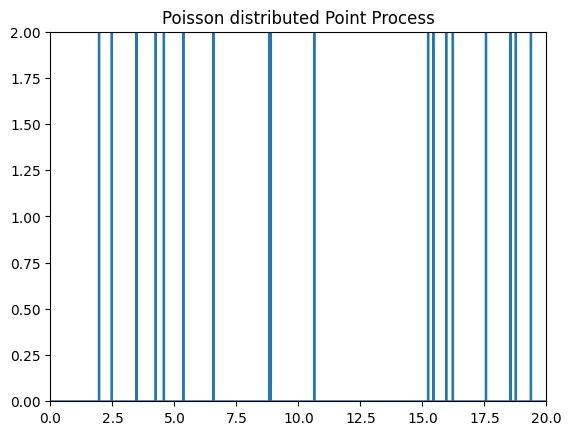

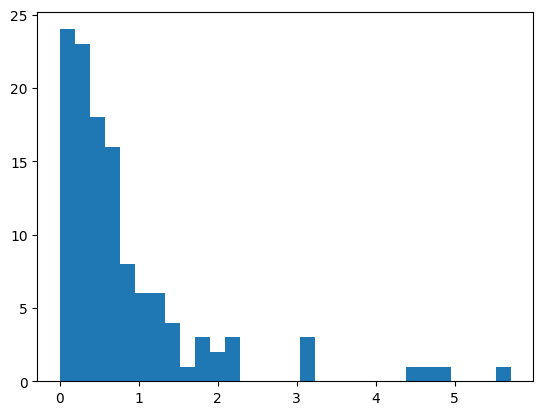

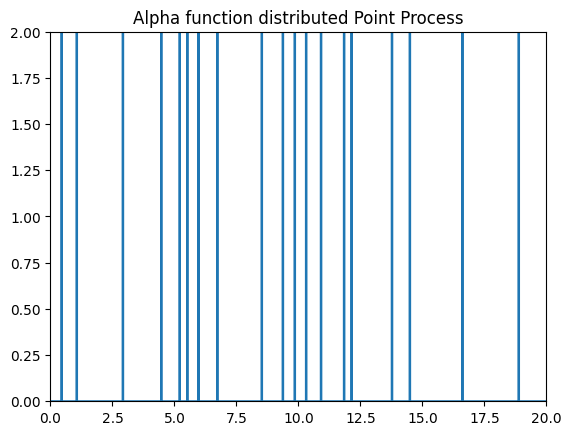

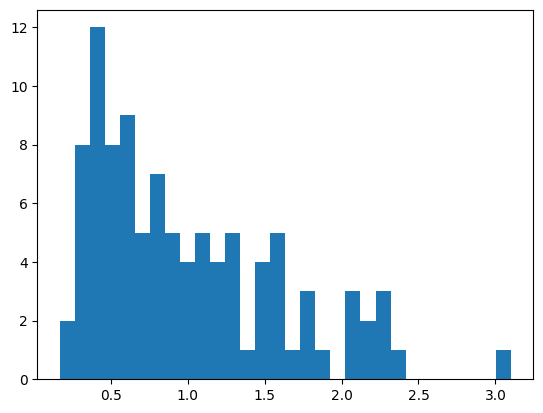

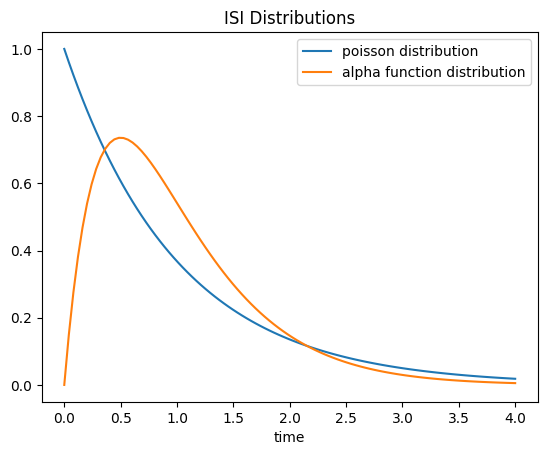

In [4]:
### POINT PROCESSES ###

# --- Configuration Paramters ---
M = 1000
T = 100
dt = 0.01
N = int(T/dt)
average_ISI = 1    # average interspike interval

# --- Simulate the point processes ---

#inititiate random generator
rng = np.random.default_rng()

#write a function that generates an array with poisson distributed ISI within the given time interval 
def ISI_Generator_poisson(T):
    
    ISI = []
    total_time = 0.0

    #check that intervals dont exceed time bounds
    while True:
        new_ISI = rng.exponential(scale=1/average_ISI)

        if total_time + new_ISI >= T:
            break
        else:
            ISI.append(round(new_ISI,int(np.abs(np.log10(dt)))))    #make sure that ISI has same number of floating points as time samples with step size dt
            total_time += new_ISI

    return ISI

#write a function that generates an array with alpha distributed ISI within the given time interval 
def ISI_Generator_alpha(T):

    ISI = []
    total_time = 0.0

    #check that intervals dont exceed time bounds
    while True:
        new_ISI_1 = rng.exponential(scale=1/(2*average_ISI))         #calculate alpha distribution by taking two exponentially distributed numbers with avg 1/2r and add them up
        new_ISI_2 = rng.exponential(scale=1/(2*average_ISI))
        new_ISI = new_ISI_1 + new_ISI_2

        if total_time + new_ISI >= T:
            break
        else:
            ISI.append(round(new_ISI,int(np.abs(np.log10(dt)))))    #make sure that ISI has same number of floating points as time samples with step size dt
            total_time += new_ISI
        
    return ISI


#function that outputs arrays to plot point process for a given ISI array (and total time and time steps)
def Point_Process(ISI,T,dt):
    
    attained_values = []
    #generate time array
    t = np.linspace(0,T,int(T/dt))
    
    #for the ISI fill timesteps with zeros and then one point with an arbitrary value to indicate the delta spike
    for k in range(len(ISI)):
        attained_values.extend([0 for i in range(int(ISI[k]/dt)-1)])
        #if case handles the interval between last delta spike and the time limit
        if k < len(ISI)-1:
            attained_values.append(1/dt)    ### IMPORTANT! It is crucial to initialise the value of the delta spike in a way that ensures that its integral evaluates to one
        else:
            attained_values.extend([0 for i in range(int(T/dt) - len(attained_values))])
    
    return t, attained_values

#def theretical distributions
def exp(t):
    return average_ISI*np.exp(-average_ISI*t)

def alpha(t):
    return 4*average_ISI**2 * t *np.exp(-2*average_ISI*t)

# --- Plotting ---

ISI = ISI_Generator_poisson(T)
plt.plot(Point_Process(ISI,int(T),dt)[0],Point_Process(ISI,int(T),dt)[1])
plt.ylim(0,2)
plt.xlim(0,20)
plt.title('Poisson distributed Point Process')
plt.show()
plt.hist(ISI,bins=30)
plt.show()

ISI2 = ISI_Generator_alpha(T)
plt.plot(Point_Process(ISI2,T,dt)[0], Point_Process(ISI2,T,dt)[1])
plt.ylim(0,2)
plt.xlim(0,20)
plt.title('Alpha function distributed Point Process')
plt.show()
plt.hist(ISI2,bins=30)
plt.show()

plt.plot(np.linspace(0,4,100), [exp(t) for t in np.linspace(0,4,100)], label='poisson distribution')
plt.plot(np.linspace(0,4,100), [alpha(t) for t in np.linspace(0,4,100)], label='alpha function distribution')
plt.xlabel('time')
plt.title('ISI Distributions')
plt.legend()
plt.show()



    

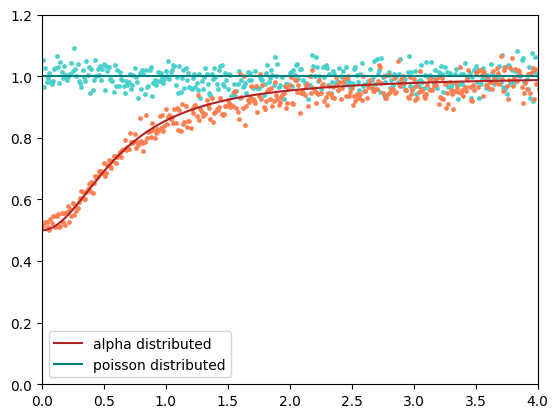

In [6]:
# --- Calculate and Plot the Power Spectrum ---

avg1 = np.zeros(N)
avg2 = np.zeros(N)
ft_frequencies = fftfreq(N,dt)
for i in range(M):
    ft_point_process1 = fft(Point_Process(ISI_Generator_poisson(T),T,dt)[1]) * dt
    ft_point_process2 = fft(Point_Process(ISI_Generator_alpha(T),T,dt)[1]) * dt
    avg1 += np.abs(ft_point_process1)**2
    avg2 += np.abs(ft_point_process2)**2
    
power_spectrum_poisson = avg1 / (T * M)
power_spectrum_alpha = avg2 / (T * M)

#def the theoretical power spectra

def power_spectrum_alpha_spike_train(f):
    r = 1/average_ISI
    return r * (1 - (2*r**2)/(4*r**2 + (np.pi*f)**2))

plt.scatter(ft_frequencies[1:N//2],power_spectrum_poisson[1:N//2],linewidths=0.4, marker='.', color = 'mediumturquoise')
plt.scatter(ft_frequencies[1:N//2],power_spectrum_alpha[1:N//2],linewidths=0.4, marker='.', color='coral')
plt.plot(ft_frequencies[1:N//2], [power_spectrum_alpha_spike_train(f) for f in ft_frequencies[1:N//2]], label = 'alpha distributed', color='firebrick')
plt.plot(ft_frequencies[1:N//2], [1 for i in range(1,int(N/2))], label = 'poisson distributed', color='teal')
plt.xlim(0,4)
plt.ylim(0,1.2)
plt.legend()
plt.show()

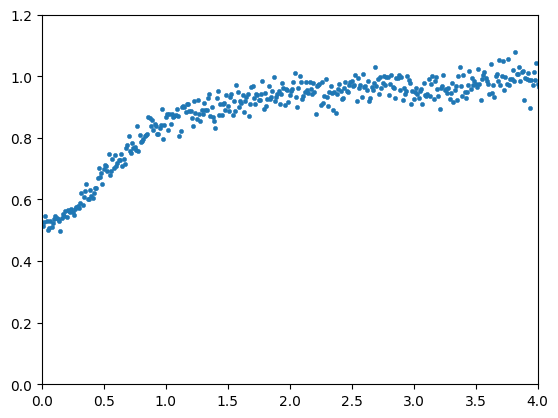

In [16]:
#### This code snippet isnt necessary for this code but was usedd as a test for the power spectrum function I developped for the TwoStateProcess_FirstTests.ipynb file
def power_spectrum(process_generator, realizations: int, *args, **kwargs):
    #call process generator once to initialize variables:
    time_sequence,state_sequence = process_generator(*args,**kwargs)
    number_sample_points = len(time_sequence)
    dt = time_sequence[1]-time_sequence[0]
    average = np.zeros(number_sample_points)
    #calculate first iteration with initialized variables
    ft_state_sequence = fft(state_sequence)*dt
    average += np.abs(ft_state_sequence)**2

    #calculate ensemble average over remaining realizations
    for i in range(1,realizations):
        time_sequence,state_sequence = process_generator(*args,**kwargs)
        ft_state_sequence = fft(state_sequence)*dt
        if len(average) == len(ft_state_sequence):
            average += np.abs(ft_state_sequence)**2
        else: 
            print(f'Flag for realisation {i}')
            print(f'Mismatch: {len(average)} is not equal to {len(ft_state_sequence)}')

    #calculate final outputs
    frequency_sequence = fftfreq(number_sample_points,dt)
    power_spectrum_sequence = average/(realizations * (len(time_sequence)*dt))

    return frequency_sequence,power_spectrum_sequence

acumulator = np.zeros(10000)
for i in range(1000):
    f,psd = power_spectrum(Point_Process,1,ISI_Generator_alpha(100),100,0.01)
    acumulator += psd
acumulator = 1/(1000)*acumulator
plt.scatter(f[1:N//2],acumulator[1:N//2],linewidths=0.4, marker='.')
plt.xlim(0,4)
plt.ylim(0,1.2)
plt.show()

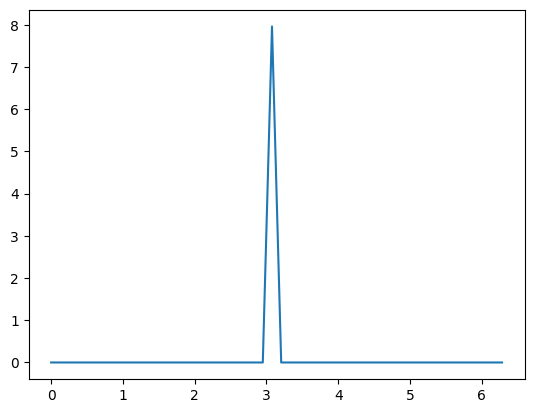

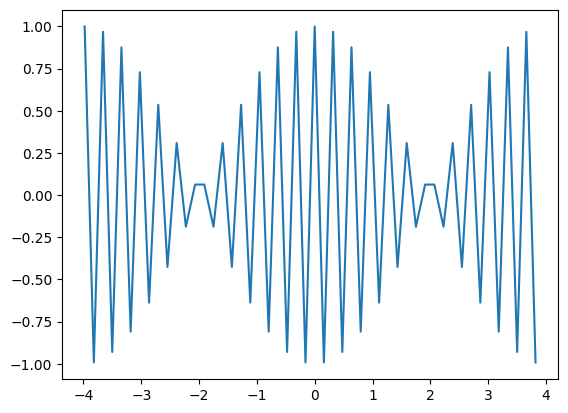

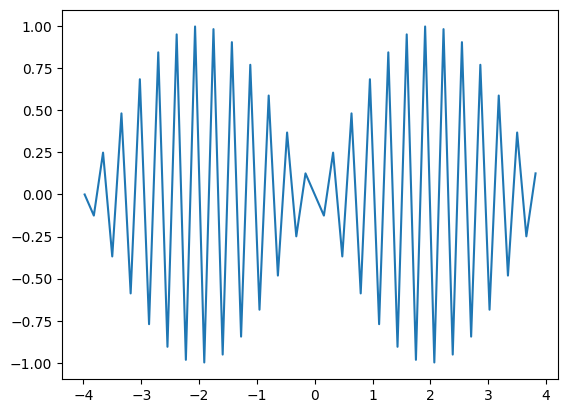

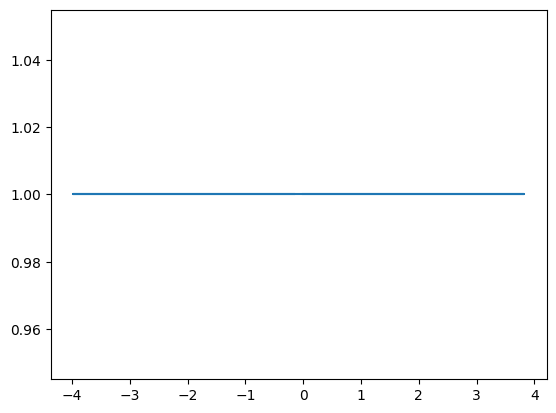

In [497]:
N = 50   #sample size
dt = 2*np.pi/N
x = np.linspace(0,2*np.pi,N)
f = [0 for i in range(int(N/2 - 1))]
f.append(1/dt)
f.extend([0 for i in range(int(N/2))])

plt.plot(x,f)
plt.show()

ft = fft(f) * dt
freq = fftfreq(N,dt)

plt.plot(fftshift(freq),np.real(ft))
plt.show()
plt.plot(fftshift(freq),np.imag(ft))
plt.show()

ps = np.abs(ft)**2 / (2*np.pi)
plt.plot(freq,np.abs(ft)**2)
plt.show()